# Pandas for Word Frequency Analysis


In [126]:
import pandas as pd
from collections import Counter
import nltk
from nltk.stem.lancaster import LancasterStemmer

Pandas has two common data structures: 

 - Series (for one-dimensional data) 
 - DataFrame (for two-dimensional data) 

Our goal: 

  | Narrators:  | Betteredge  |  Clack   |  Bruff  |  Blake  |
  |-------------|-------------|----------|---------|---------|
  |   I         |      300    |      400 |     800 |     1500|
  |   him       |     34      |    345   |   234   |  2342   | 



In [3]:
counts = {"Betteredge": {"I": 300, "him": 34}, "Clack": {"I": 400, "him": 345}}

In [5]:
moonstone = open('../Readings/content/texts/moonstone.md').read()

In [50]:
moonstoneParts = moonstone.split('\n##')
betteredge = '\n'.join(moonstoneParts[5:29])
moonstoneParts2 = moonstone.split('\n## ')

In [51]:
clack, bruff, blake = [moonstoneParts2[part] for part in [3,4,5]]

In [127]:
stemmer = LancasterStemmer()

In [128]:
def counted(textString): 
    lowered = textString.lower()
    lowered = lowered.replace('–', ' – ') 
    lowered = lowered.replace('*', ' ')
    tokens = nltk.word_tokenize(lowered)
    stems = [stemmer.stem(token) for token in tokens]
    counted = Counter(stems)
    return counted

In [67]:
def numWords(textString): 
    lowered = textString.lower()
    tokens = nltk.word_tokenize(lowered)
    return len(tokens)

In [74]:
allNumWords = []
for narrator in [betteredge, clack, bruff, blake]:
    narratorNumWords = numWords(narrator)
    allNumWords.append(narratorNumWords)

In [75]:
allNumWords

[94869, 36259, 12132, 52217]

In [76]:
allNumWords = [numWords(narrator) for narrator in [betteredge, clack, bruff, blake]]

In [77]:
allNumWords

[94869, 36259, 12132, 52217]

In [129]:
allCounts = {"betteredge": counted(betteredge), "clack": counted(clack), 
             "bruff": counted(bruff), "blake": counted(blake)}

In [130]:
narratorsDF = pd.DataFrame(allCounts).fillna(0)

In [131]:
narratorsDF.sort_values(by='betteredge')

,betteredge,clack,bruff,blake
was.,0.0,0.0,0.0,1.0
noiseless,0.0,1.0,1.0,0.0
away.,0.0,1.0,0.0,0.0
platform,0.0,1.0,0.0,0.0
flattery,0.0,1.0,0.0,0.0
...,...,...,...,...
of,2138.0,861.0,397.0,1237.0
to,2678.0,1070.0,393.0,1609.0
.,3459.0,1392.0,413.0,1937.0
the,4865.0,1608.0,678.0,2621.0


In [132]:
narratorsDF

,betteredge,clack,bruff,blake
#,24.0,24.0,9.0,30.0
first,135.0,35.0,31.0,87.0
period,7.0,3.0,4.0,2.0
the,4865.0,1608.0,678.0,2621.0
loss,27.0,5.0,6.0,15.0
...,...,...,...,...
keeping.,0.0,0.0,0.0,1.0
irrevoc,0.0,0.0,0.0,1.0
reassembl,0.0,0.0,0.0,2.0
reassum,0.0,0.0,0.0,1.0


In [133]:
narratorsFreqDF = narratorsDF / allNumWords

To get a column in Pandas: 

```
narratorsFreqDf['betteredge']
```

To get a row in Pandas: 

```
narratorsFreqDf.loc['the']
```

In [134]:
narratorsFreqDF.loc['first']

betteredge    0.001423
clack         0.000965
bruff         0.002555
blake         0.001666
Name: first, dtype: float64

In [135]:
narratorsFreqDF.loc['diamond']

betteredge    0.001729
clack         0.000359
bruff         0.001649
blake         0.001436
Name: diamond, dtype: float64

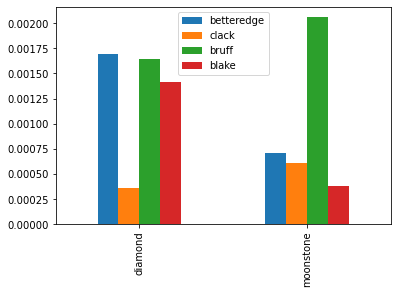

In [88]:
narratorsFreqDF.loc[['diamond', 'moonstone']].plot(kind="bar")

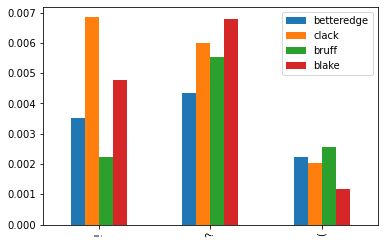

In [91]:
narratorsFreqDF.loc[['!', '?', '(']].plot(kind="bar")

## Finding Distinctive Words

A distinctive word is used by one category way more than the average. 

In [96]:
narratorsFreqDF['average'] = narratorsFreqDF.mean(axis=1)

In [98]:
narratorsFreqDF.loc['!']

betteredge    0.003531
clack         0.006840
bruff         0.002226
blake         0.004788
average       0.004346
Name: !, dtype: float64

We define "Clackness" as the frequency of a word in Miss Clack's narrative more than average: 

In [102]:
narratorsFreqDF.loc['!']['clack'] - narratorsFreqDF.loc['!']['average']

0.0024936565845637016

In [105]:
clackness = narratorsFreqDF['clack'] - narratorsFreqDF['average'] 

In [109]:
clackness.sort_values(ascending=False).head(40)

!            0.002494
she          0.002225
godfrey      0.002160
aunt         0.002037
.            0.001893
my           0.001819
dear         0.001701
rachel       0.001558
her          0.001518
a            0.001483
ablewhite    0.001263
–            0.001096
clack        0.001033
by           0.001015
not          0.000930
words        0.000799
is           0.000758
oh           0.000650
are          0.000610
miss         0.000591
has          0.000580
bruff        0.000548
christian    0.000517
be           0.000517
room         0.000481
am           0.000480
precious     0.000479
friends      0.000452
don          0.000446
quite        0.000440
even         0.000438
mother       0.000435
drusilla     0.000434
but          0.000428
such         0.000406
son          0.000395
poor         0.000395
never        0.000394
our          0.000359
worldly      0.000352
dtype: float64

In [116]:
def distinctiveWords(narrator, df): 
    """ Gets a series of the distinctive words for a narrator. """
    narr = df[narrator]
    average = df['average']
    distinction = narr - average
    return distinction

def mostDistinctive(distinctiveSeries):
    return distinctiveSeries.sort_values(ascending=False).head(40)

def leastDistinctive(distinctiveSeries):
    return distinctiveSeries.sort_values().head(40)

In [122]:
leastDistinctive(distinctiveWords('betteredge', narratorsFreqDF))

i           -0.005451
of          -0.003137
you         -0.002402
which       -0.002134
to          -0.002008
me          -0.001914
–           -0.001501
my          -0.001331
?           -0.001329
bruff       -0.000968
at          -0.000964
had         -0.000942
would       -0.000910
verinder    -0.000897
be          -0.000860
ablewhite   -0.000840
!           -0.000815
godfrey     -0.000795
have        -0.000789
luker       -0.000786
will        -0.000683
that        -0.000605
can         -0.000568
dear        -0.000559
aunt        -0.000554
it          -0.000515
some        -0.000478
is          -0.000466
moment      -0.000450
am          -0.000447
position    -0.000434
clack       -0.000425
so          -0.000424
was         -0.000411
who         -0.000393
may         -0.000371
marriage    -0.000371
indian      -0.000345
felt        -0.000343
“           -0.000334
dtype: float64

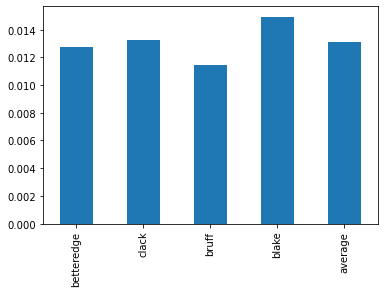

In [120]:
narratorsFreqDF.loc['“'].plot(kind='bar')

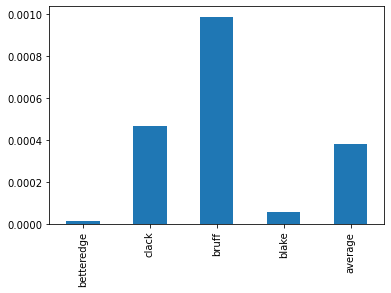

In [123]:
narratorsFreqDF.loc['marriage'].plot(kind='bar')

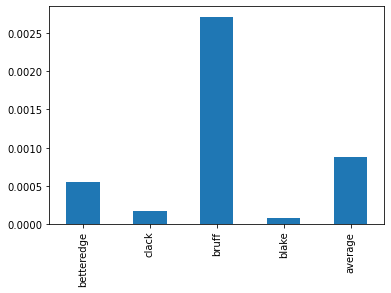

In [125]:
narratorsFreqDF.loc['indians'].plot(kind='bar')

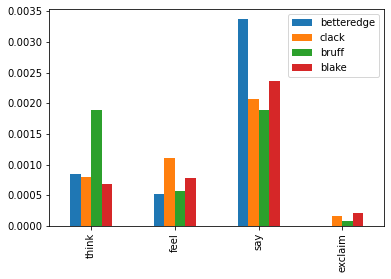

In [138]:
# Looking at verb stems
narratorsFreqDF.loc[['think', 'feel', 'say', 'exclaim']].plot(kind='bar')

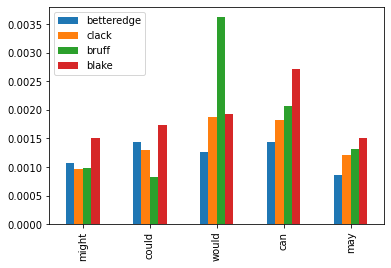

In [140]:
# Looking at modals
narratorsFreqDF.loc[['might', 'could', 'would', 'can', 'may']].plot(kind='bar')

In [143]:
blakeText = nltk.Text(nltk.word_tokenize(blake))
blakeText.concordance('can')

Displaying 25 of 139 matches:
 on an answer , ” he said , “ I own I can place no other interpretation on her 
ards me . If time , pains , and money can do it , I will lay my hand on the thi
 I left it , which Gabriel Betteredge can supply , and to Gabriel Betteredge I 
 kitchen all that your fondest wishes can desire. ’ For the rest of that woman 
rm , barely two miles from here . You can hardly object to *that* on Miss Rache
–by meddling with the Moonstone . How can *you* hope to succeed ( saving your p
ust to worse than me , Mr. Franklin–I can tell you that , ” he said a little sh
Cuff has left behind him . I know you can do that . Can you do no more ? ” “ Wh
behind him . I know you can do that . Can you do no more ? ” “ What more can yo
 . Can you do no more ? ” “ What more can you expect from me , sir ? ” asked Be
f her secret will reveal nothing that can alter her place in your estimation , 
. Franklin , ” he exclaimed , “ all I can say is–I am as innocent of seeing it 
t of seein